# Data Wrangling project
#### Creator Name: ZHIYIN WANG


Date: 18/10/2020

Version: 2.0

Environment: Python 3.6.0

Libraries used:
* pandas 0.19.2 (for data frame, included in Anaconda Python 3.6) 
* math (for math calculation, included in Anaconda Python 3.6) 
* numpy(for solving equations, included in Anaconda Python 3.6)
* nltk.sentiment.vader (for getting polarity score from text, included in Anaconda Python 3.6 and 'nltk.download('vader_lexicon')' provided)
* sklearn.linear_model(for generating linear model from predictors and predict values, included in Anaconda Python 3.6)
* matplotlib.pyplot(for visualisation, drawing plots, included in Anaconda Python 3.6）


## 1. Introduction
For this project, we are going to write Python (Python 2/3) code to analyze the dataset, find and fix the problems in the data. There are three files we need to work on： 
- dirty_data.csv
- outlier_data.csv
- missing_data.csv


We need to exploring and understanding the data is one of the most important parts of the data wrangling
process. We will perform graphical and/or non-graphical EDA methods to understand
the data first and then find and fix the data problems. 

The tasks are the following:
* Detect and fix errors in dirty_data.csv
* Detect and remove outlier rows in outlier_data.csv (outliers are to be found w.r.t. delivery_charges attribute only)
* Impute the missing values in missing_data.csv

## 2.  Import Libraries

In [195]:
#Basic scientific python libs
import pandas as pd
import math
import numpy as np
# nltk.sentiment.vader module
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# download lexicon file
import nltk
nltk.download('vader_lexicon')

# linear model
from sklearn.linear_model import LinearRegression

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package vader_lexicon to C:\Users\Alan
[nltk_data]     Wang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 3. Load the data 

In [196]:
# read data and assign them using panda's function "read_csv"
dirty_data = pd.read_csv("dirty_data.csv")
outlier_data = pd.read_csv("outlier_data.csv")
missing_data = pd.read_csv("missing_data.csv")
warehouse = pd.read_csv("warehouses.csv")

## 4. dirty data

To find errors in `the dirty_data.csv` , We start by looking at the dimensionality of the data and head of the data.

In [197]:
print(dirty_data.shape)
dirty_data.head(10)

(500, 16)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD249513,ID1459448721,2019-01-04,Bakers,"[('Universe Note', 2), ('Alcon 10', 1)]",13400,79.89,-37.819538,145.008880,15,11469.89,Summer,False,1.6027,None,True
1,ORD408577,ID0301542599,2019-02-28,Thompson,"[('Thunder line', 2), ('pearTV', 1)]",10670,77.27,-37.822139,144.949866,5,10213.77,Summer,False,1.0820,five stars great value,True
2,ORD251872,ID3215192366,2019-12-29,Thompson,"[('Olivia x460', 1), ('Lucent 330S', 2), ('iAs...",24175,68.42,-37.809187,144.945239,5,7796.67,Summer,False,0.4201,five stars love it,True
3,ORD383274,ID0395252517,2019-04-30,nickolson,"[('Universe Note', 1), ('Candle Inferno', 1)]",3880,69.53,-37.799950,144.977110,10,3561.53,Autumn,False,1.9470,used for employees use these phones to hand ou...,True
4,ORD387489,ID0577521804,2019-05-02,Nickolson,"[('iStream', 2), ('iAssist Line', 2), ('Alcon ...",17150,65.02,-37.823326,144.972047,5,16357.52,autumn,False,0.5705,great tablet but apps limited comparison of ot...,True
5,ORD014190,ID1479897587,2019-09-13,Nickolson,"[('Olivia x460', 1), ('iStream', 2), ('pearTV'...",7835,102.38,-37.820108,144.958328,15,6762.13,Spring,False,1.0012,five stars nice used phone,True
6,ORD001360,ID0176722515,2019-07-31,Nickolson,"[('Universe Note', 1), ('iStream', 2), ('Olivi...",9425,76.09,-37.814134,144.967304,10,8558.59,Winter,False,0.5344,"like a tablet. great, fast connection. everyth...",True
7,ORD394829,ID1217532920,2019-03-23,Thompson,"[('pearTV', 1), ('Olivia x460', 2), ('iStream'...",11090,48.01,-37.818102,144.948573,0,11138.01,Autumn,False,0.6186,i have had this phone for less than 3 months ....,False
8,ORD493520,ID3924931354,2019-11-21,Nickolson,"[('Toshika 750', 1), ('Lucent 330S', 1), ('iSt...",6130,96.67,-37.816280,144.966995,0,6226.67,Spring,True,0.3419,excellent phone! great phone!! it works smooth...,True
9,ORD045721,ID0777783111,2019-21-06,Thompson,"[('iStream', 1), ('Universe Note', 1), ('Thund...",23680,66.38,-37.804775,144.953908,10,21378.38,Winter,False,1.0653,i love it! learning knew things with it eveyda...,True


Next, we have a look at key information about each variable to understand more about them.

In [198]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

We go through each variable and conclude that all variables are in the correct data type.

To identify any problem, lets check the distribution of the numerical variables in the data.

In [199]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,13418.010000,77.777980,-27.942397,135.097606,11.11000,11785.974540,1.040945
std,7882.758855,14.533738,41.353094,41.352624,8.84162,6929.822789,0.494563
min,580.000000,47.340000,-37.827894,-37.825319,0.00000,539.640000,0.035300
25%,6878.750000,66.725000,-37.818449,144.951734,5.00000,6489.780000,0.692225
50%,12415.000000,77.050000,-37.812390,144.963400,10.00000,10436.275000,0.999200
75%,18747.500000,85.925000,-37.804774,144.978766,15.00000,16654.627500,1.336000
max,43610.000000,122.170000,145.008961,145.019706,25.00000,41502.140000,3.382900


What about the categorical variables?

In [200]:
dirty_data.describe(include = ["O"])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,493,295,6,463,8,500
top,ORD151294,ID3185718967,2019-09-01,Nickolson,"[('iStream', 2), ('Toshika 750', 1)]",Spring,becomes a memory hog after few weeks of usage....
freq,1,2,5,195,3,138,1


### Identify Anomalies 

### 4.1 `Season`

From describe function, we can see that there are 8 unique values in season. There should be only four season, 8 indicates there are errors in the column.

In [201]:
# check season, why are there 8 unique value in season?
dirty_data.season.value_counts()

Spring    138
Summer    120
Winter    118
Autumn    103
winter      6
spring      5
summer      5
autumn      5
Name: season, dtype: int64

Lexical errors: 

Using `value_count()`, we find that there are inconsistent spellings of season names. Some seasons are written in lower cases, soem are in upper cases. The assumption we made here is that it is less likely that the spelling with large counts is wrong. Therefore, we will fix the names with lowercases by the `replace()` function.

In [202]:
# Some seasons are written in lower cases, we need to fix them 

dirty_data.season.replace({'winter':'Winter', 'autumn':'Autumn','summer':'Summer', 'spring':'Spring'}, inplace = True)

# check again

dirty_data.season.value_counts()

Spring    143
Summer    125
Winter    124
Autumn    108
Name: season, dtype: int64

### 4.2 `nearest_warehouse`

What about the warehouse columns, there are only three warehouses, why is there 6 unique values? Does this spelling error also apply to warehouse names?

In [203]:
# check the names of warehouse

dirty_data.nearest_warehouse.value_counts()

Nickolson    195
Thompson     187
Bakers        96
nickolson     12
thompson       6
bakers         4
Name: nearest_warehouse, dtype: int64

Yes, we find the same issue here, some names are wrttien in lower cases, lets fix them.

In [204]:
# Same issue here, some names are wrttien in lower cases, lets fix them

dirty_data.nearest_warehouse.replace({'nickolson':'Nickolson', 'thompson':'Thompson', 'bakers':'Bakers'}, inplace = True)

# check again

dirty_data.nearest_warehouse.value_counts()

Nickolson    207
Thompson     193
Bakers       100
Name: nearest_warehouse, dtype: int64

### 4.3 `Customer_lat` and `customer_long`

From the `describe()` we observed that the maximum for latitute is 145.008961 and minimum for longitude is -37.825319. The value for latitute at 145 is definitely incorrect, latitude only have range from -90 to 90. It might be entry errors where latitude is entered as longitude or the otherway around. Lets fix these syntactical anomalies.

As it is in Australia, most latitude is around -37 and longitude around 144, thus we want to find the ones where latitude is positive and swap it with its longitude value.

In [205]:
# swap the value of two columns where latitude is positive (not around -37)
dirty_data[['customer_lat','customer_long']] = dirty_data[['customer_long','customer_lat']].where(dirty_data['customer_lat'] > 0, dirty_data[['customer_lat','customer_long']].values) 

In [206]:
# double check after fixing
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,13418.010000,77.777980,-37.812490,144.967698,11.11000,11785.974540,1.040945
std,7882.758855,14.533738,0.007717,0.019383,8.84162,6929.822789,0.494563
min,580.000000,47.340000,-37.827894,144.928555,0.00000,539.640000,0.035300
25%,6878.750000,66.725000,-37.818843,144.953951,5.00000,6489.780000,0.692225
50%,12415.000000,77.050000,-37.812936,144.964152,10.00000,10436.275000,0.999200
75%,18747.500000,85.925000,-37.806209,144.979340,15.00000,16654.627500,1.336000
max,43610.000000,122.170000,-37.786554,145.019706,25.00000,41502.140000,3.382900


### 4.4 Warehouse and `distance_to_nearest_warehouse`



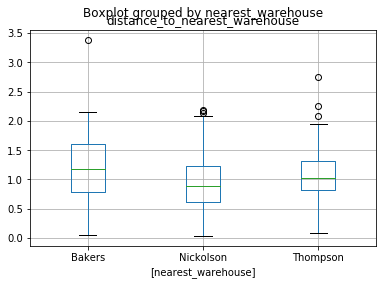

In [207]:
# check the distribution of each warehouse
dirty_data.loc[:,['nearest_warehouse','distance_to_nearest_warehouse']].boxplot(by = 'nearest_warehouse')

From the boxplot we can see that the distribution and the mean of distance does differs between different warehouses. Also based on given domain, it is reasonable to think that two variables must be correlated.

In [208]:
# Check lat and long of each warehouse 
warehouse

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


Now with given location of the warehouse in `warehouse.csv` and the correct location of customer, we are able to verify the distance values using haversine formula.

In [209]:
# function to calculate distance
def distance_to_warehouse(lat1, lon1,lat2,lon2):
    R = 6378 # radius of earth
    
    # calculate constants
    lat_diff = (lat2 - lat1) * (math.pi/180)
    lon_diff = (lon2 - lon1) * (math.pi/180)
    lat_const1 = lat1 * (math.pi/180)
    lat_const2 = lat2 * (math.pi/180)
    a = (math.sin(lat_diff/2) ** 2) + math.cos(lat_const1) * math.cos(lat_const2) * (math.sin(lon_diff/2) ** 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # calcualte distance
    distance = round(R * c, 4)
    
    return distance

Now we can use the formula to replace all the wrong distances in the dataset. Use warehouse name to determine the 
latitude and longitude. Use loop to run through the whole dataset.

In [210]:
# check if distance to warehouse is correct

for i in range(len(dirty_data.nearest_warehouse)):
    # assign lat and long values based on warehouse name
    if dirty_data.nearest_warehouse[i] == warehouse.names[0]:
        ware_lat = warehouse.lat[0]
        ware_lon = warehouse.lon[0]
    elif dirty_data.nearest_warehouse[i] == warehouse.names[1]:
        ware_lat = warehouse.lat[1]
        ware_lon = warehouse.lon[1]
    elif dirty_data.nearest_warehouse[i] == warehouse.names[2]:
        ware_lat = warehouse.lat[2]
        ware_lon = warehouse.lon[2]
        
    # assign the lat and long of customer   
    cus_lat = dirty_data.customer_lat[i]
    cus_lon = dirty_data.customer_long[i]
    
    # calculate the distance between customer and warehouse
    distance = distance_to_warehouse(ware_lat, ware_lon, cus_lat, cus_lon)
    
    # find the values that does not match and replace value with distance just calculated by formula
    if distance != dirty_data.distance_to_nearest_warehouse[i]:
        dirty_data.distance_to_nearest_warehouse[i] = distance

### 4.5 `Date`

Now, lets check if there are any problem in date column.

In [211]:
# Check if date format is consistent
dirty_data.loc[0:11]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD249513,ID1459448721,2019-01-04,Bakers,"[('Universe Note', 2), ('Alcon 10', 1)]",13400,79.89,-37.819538,145.008880,15,11469.89,Summer,False,1.6027,None,True
1,ORD408577,ID0301542599,2019-02-28,Thompson,"[('Thunder line', 2), ('pearTV', 1)]",10670,77.27,-37.822139,144.949866,5,10213.77,Summer,False,1.0820,five stars great value,True
2,ORD251872,ID3215192366,2019-12-29,Thompson,"[('Olivia x460', 1), ('Lucent 330S', 2), ('iAs...",24175,68.42,-37.809187,144.945239,5,7796.67,Summer,False,0.4201,five stars love it,True
3,ORD383274,ID0395252517,2019-04-30,Nickolson,"[('Universe Note', 1), ('Candle Inferno', 1)]",3880,69.53,-37.799950,144.977110,10,3561.53,Autumn,False,2.1794,used for employees use these phones to hand ou...,True
4,ORD387489,ID0577521804,2019-05-02,Nickolson,"[('iStream', 2), ('iAssist Line', 2), ('Alcon ...",17150,65.02,-37.823326,144.972047,5,16357.52,Autumn,False,0.5705,great tablet but apps limited comparison of ot...,True
5,ORD014190,ID1479897587,2019-09-13,Nickolson,"[('Olivia x460', 1), ('iStream', 2), ('pearTV'...",7835,102.38,-37.820108,144.958328,15,6762.13,Spring,False,1.0012,five stars nice used phone,True
6,ORD001360,ID0176722515,2019-07-31,Nickolson,"[('Universe Note', 1), ('iStream', 2), ('Olivi...",9425,76.09,-37.814134,144.967304,10,8558.59,Winter,False,0.5344,"like a tablet. great, fast connection. everyth...",True
7,ORD394829,ID1217532920,2019-03-23,Thompson,"[('pearTV', 1), ('Olivia x460', 2), ('iStream'...",11090,48.01,-37.818102,144.948573,0,11138.01,Autumn,False,0.6186,i have had this phone for less than 3 months ....,False
8,ORD493520,ID3924931354,2019-11-21,Nickolson,"[('Toshika 750', 1), ('Lucent 330S', 1), ('iSt...",6130,96.67,-37.816280,144.966995,0,6226.67,Spring,True,0.3419,excellent phone! great phone!! it works smooth...,True
9,ORD045721,ID0777783111,2019-21-06,Thompson,"[('iStream', 1), ('Universe Note', 1), ('Thund...",23680,66.38,-37.804775,144.953908,10,21378.38,Winter,False,1.0653,i love it! learning knew things with it eveyda...,True


We find that date format are not always the same, in roll 9 the date is in year-day-month instead of year-month-day. Need to keep it consistent.

First, lets split the date column into three seperate column: `year`, `month` and `day`. 

In [212]:
# split the date column in to year, month and day columns

dirty_data[["Year","Month","Day"]] = dirty_data.date.str.split("-", expand = True)


Now, for Month with value that is larger than 12, we want to swap the value of day and month, so the date value is in the correct format (%Y-%m-%d).

This method works because lucky the inconsistent dates in data are dates start from the 13th of the month. Thus, this method of detection is valid.


In [213]:
# swap values in month and day columns, if month is > 12

dirty_data[['Month','Day']] = dirty_data[['Day','Month']].where(pd.to_numeric(dirty_data['Month'])>12, dirty_data[['Month','Day']].values)

Check the month values after the process

In [214]:
# check month values 

dirty_data.Month.value_counts()

10    51
09    50
07    48
11    43
01    43
05    42
06    40
12    40
02    39
08    37
04    36
03    31
Name: Month, dtype: int64

Now we have the corrected value in the month and day column, before we combine the year-month-day columns back to one, there is another thing i would like to verify.

### 4.6 `Date` and `season`
For each season, there is a date range correspond to that season. 
According to Australia government, in Australia, the seasons are defined by grouping the calendar months in the following way:

Spring - the three transition months September, October and November.

Summer - the three hottest months December, January and February.

Autumn - the transition months March, April and May.

Winter - the three coldest months June, July and August. 

Ideally, the season and month values should match. Which means we can use month value to check if season values are the corresponded season names. If not match, we can say that particular season value is incorrect, as its highly unlikely a exact given date is wrong. Even if it is wrong, there is no way to fix it. Therefore, we choose to fix the season values. 

In [215]:
pd.crosstab(dirty_data.season, dirty_data.Month)

Month,01,02,03,04,05,06,07,08,09,10,11,12
season,,,,,,,,,,,,
Autumn,1,1,30,34,41,0,1,0,0,0,0,0
Spring,0,0,0,1,0,1,0,1,48,50,41,1
Summer,42,38,1,0,1,0,1,0,2,1,1,38
Winter,0,0,0,1,0,39,46,36,0,0,1,1


Using `pd.crosstab()` function we observed that there are contradictions between season and month. We need to find the wrong season and fix it.

In [216]:
season_list = ('Spring','Summer','Autumn','Winter')
Spring = (9, 10, 11)
Summer = (12, 1, 2)
Autumn = (3, 4, 5)
Winter = (6, 7, 8)

for season in season_list:
    if season == 'Spring':
        month = Spring
    elif season == 'Summer':
        month = Summer
    elif season == 'Autumn':
        month = Autumn
    elif season == 'Winter':
        month = Winter
    for i in range(0,499):
        if dirty_data.season[i] == season and pd.to_numeric(dirty_data.Month[i]) not in month:
            if pd.to_numeric(dirty_data.Month[i]) in Spring:
                dirty_data.season[i] = 'Spring'
            elif pd.to_numeric(dirty_data.Month[i]) in Summer:
                dirty_data.season[i] = 'Summer'
            elif pd.to_numeric(dirty_data.Month[i]) in Autumn:
                dirty_data.season[i] = 'Autumn'
            elif pd.to_numeric(dirty_data.Month[i]) in Winter:
                dirty_data.season[i] = 'Winter'


Lets check the month and season column again

In [217]:
# Check again
pd.crosstab(dirty_data.season, dirty_data.Month)

Month,01,02,03,04,05,06,07,08,09,10,11,12
season,,,,,,,,,,,,
Autumn,0,0,31,36,42,0,0,0,0,0,0,0
Spring,0,0,0,0,0,0,0,0,50,51,43,0
Summer,43,39,0,0,0,0,0,0,0,0,0,40
Winter,0,0,0,0,0,40,48,37,0,0,0,0


Now, all months belong to the correct season names.

Combine the year-month-day columns back to one column and delect the old date columns.

In [218]:
# combine the year-month-day back to one column
dirty_data.drop(['date'], axis = 1, inplace = True)
dirty_data['date'] = dirty_data.Year + "-" + dirty_data.Month + "-" + dirty_data.Day
dirty_data.drop(['Year','Month', 'Day'], axis = 1, inplace = True)


In [219]:
# reorder the columns
dirty_data = dirty_data[['order_id',
 'customer_id','date',
 'nearest_warehouse',
 'shopping_cart',
 'order_price',
 'delivery_charges',
 'customer_lat',
 'customer_long',
 'coupon_discount',
 'order_total',
 'season',
 'is_expedited_delivery',
 'distance_to_nearest_warehouse',
 'latest_customer_review',
 'is_happy_customer']]

dirty_data[0:10]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD249513,ID1459448721,2019-01-04,Bakers,"[('Universe Note', 2), ('Alcon 10', 1)]",13400,79.89,-37.819538,145.008880,15,11469.89,Summer,False,1.6027,None,True
1,ORD408577,ID0301542599,2019-02-28,Thompson,"[('Thunder line', 2), ('pearTV', 1)]",10670,77.27,-37.822139,144.949866,5,10213.77,Summer,False,1.0820,five stars great value,True
2,ORD251872,ID3215192366,2019-12-29,Thompson,"[('Olivia x460', 1), ('Lucent 330S', 2), ('iAs...",24175,68.42,-37.809187,144.945239,5,7796.67,Summer,False,0.4201,five stars love it,True
3,ORD383274,ID0395252517,2019-04-30,Nickolson,"[('Universe Note', 1), ('Candle Inferno', 1)]",3880,69.53,-37.799950,144.977110,10,3561.53,Autumn,False,2.1794,used for employees use these phones to hand ou...,True
4,ORD387489,ID0577521804,2019-05-02,Nickolson,"[('iStream', 2), ('iAssist Line', 2), ('Alcon ...",17150,65.02,-37.823326,144.972047,5,16357.52,Autumn,False,0.5705,great tablet but apps limited comparison of ot...,True
5,ORD014190,ID1479897587,2019-09-13,Nickolson,"[('Olivia x460', 1), ('iStream', 2), ('pearTV'...",7835,102.38,-37.820108,144.958328,15,6762.13,Spring,False,1.0012,five stars nice used phone,True
6,ORD001360,ID0176722515,2019-07-31,Nickolson,"[('Universe Note', 1), ('iStream', 2), ('Olivi...",9425,76.09,-37.814134,144.967304,10,8558.59,Winter,False,0.5344,"like a tablet. great, fast connection. everyth...",True
7,ORD394829,ID1217532920,2019-03-23,Thompson,"[('pearTV', 1), ('Olivia x460', 2), ('iStream'...",11090,48.01,-37.818102,144.948573,0,11138.01,Autumn,False,0.6186,i have had this phone for less than 3 months ....,False
8,ORD493520,ID3924931354,2019-11-21,Nickolson,"[('Toshika 750', 1), ('Lucent 330S', 1), ('iSt...",6130,96.67,-37.816280,144.966995,0,6226.67,Spring,True,0.3419,excellent phone! great phone!! it works smooth...,True
9,ORD045721,ID0777783111,2019-06-21,Thompson,"[('iStream', 1), ('Universe Note', 1), ('Thund...",23680,66.38,-37.804775,144.953908,10,21378.38,Winter,False,1.0653,i love it! learning knew things with it eveyda...,True


### 4.7 `Order_price`, `coupon_discount`, `delivery_charges` and `order_total`

We know that `coupon_discount` and `delivery_charges` values are correct. Thus, we can use these two values to verify the values in `order_price` and `order_total`. The four variables follow the followling formula: order_price * coupon_discount + delivery_charges = order_total. 

In [220]:
# calculate the order_total using order price
def price_total_check(data):
    # list to store mismatch index
    price_total_list = []
    # loop to calculate order_total
    for i in range(len(data['order_total'])):
        order_total = data['order_price'][i] * (1 - data['coupon_discount'][i]/100) + data['delivery_charges'][i]
        if order_total != data['order_total'][i]:
            price_total_list.append(i)
    return price_total_list

price_total_mismatch = price_total_check(dirty_data)
# returns total numbers of mismatch
len(price_total_mismatch)

54

There are 54 pairs of `order_price` and `order_total` that do not match. But we don't know which one is wrong. To determine which variable is wrong, we need to look at `shopping_cart` and find out price of each item. 

### 4.8 `Shopping_cart` and `order_price`

Shopping cart include order items and quantities. As we know the quantities are correct, there may be issues with the order items we don't know yet. Let's first check on the item names.


In [221]:
# find all the items in shopping_cart
item_names = pd.unique(dirty_data.shopping_cart.str.extractall("(\w+.\w+)")[0])
# make it a list, easier to call the names later
item_list = list(item_names)
item_list 

['Universe Note',
 'Alcon 10',
 'Thunder line',
 'pearTV',
 'Olivia x460',
 'Lucent 330S',
 'iAssist Line',
 'Candle Inferno',
 'iStream',
 'Toshika 750']

We have find 10 unique item names, and from the result show above, there is no issue within the names of the items. 

To solve the issue we have with `order_price`, we need to calcualte price of each item. We can not do it with the dirty dataset as the price values are potientally incorrect. We will use the `outlier.csv` and `numpy.linalg` to calculate the price of each item.

In [222]:
#create function for solving linear equation

# Three dimension matrix 
# def solve_linear(x1, y1, z1, total1, x2, y2, z2, total2, x3, y3, z3, total3):
#     a = np.array([[x1, y1, z1],[x2, y2, z2],[x3, y3, z3]])
#     b = np.array([total1, total2, total3])
#     x = np.linalg.solve(a,b)
#     return x

# Two dimension matrix
def solve_linear(x1, y1, total1, x2, y2, total2):
    a = np.array([[x1, y1],[x2, y2]])
    b = np.array([total1, total2])
    x = np.linalg.solve(a,b)
    return x

In [223]:
# function to find match items
def match_item (itemnumber):
    # define list to store results
    match_list = []
    new_item_list = list(item_list[i] for i in itemnumber)
    # find items that match our list and item numbers
    for i in range(len(outlier_data.shopping_cart)):
    
        # if all items exist in that row
        if all (x in outlier_data.shopping_cart[i] for x in new_item_list):
        
            # use eval() to make one bracket = length 1, so that we can count how many items in current shopping_cart
            if len(list(eval(outlier_data.shopping_cart[i]))) == 2: 
            
            # same here, eval() so that we can call item names and item numbers through [0][0] and [0][1] etc.
            # use sorted() here to order the results, so its easier to enter into matrix.
                match = sorted(eval(outlier_data.shopping_cart[i]))
                # append to item number and name list
                match_list.append(match)
                total = outlier_data.order_price[i]
                # append order price to list
                total_list.append(total)
    return match_list

In [224]:
# create a dictionary to store item price and names 
item_dic = {}

# assign combination of 
item_number = ([0,1],[2,4],[7,8],[3,9],[2,5],[2,6])

for i in range(len(item_number)):
    # initialize list
    total_list = []
    
    # find match result of two items
    count = match_item(item_number[i])
    
    # calculate the price of the two items
    result = solve_linear(count[0][0][1],count[0][1][1],total_list[0],count[1][0][1],count[1][1][1],total_list[1])
    
    # append to dictionary
    item_dic[count[0][0][0]] = round(result[0])
    item_dic[count[0][1][0]] = round(result[1])

In [225]:
# The price of each item
item_dic

{'Alcon 10': 8950.0,
 'Universe Note': 3450.0,
 'Olivia x460': 1225.0,
 'Thunder line': 2180.0,
 'Candle Inferno': 430.0,
 'iStream': 150.0,
 'Toshika 750': 4320.0,
 'pearTV': 6310.0,
 'Lucent 330S': 1230.0,
 'iAssist Line': 2225.0}

Since we got the price of each items, we can now compute the real order price and compare with the ones in `dirty_data`. 

In [226]:
# function for checking price againest item
def price_item_check(data):
    # a list to store the index of wrong prices, used to check againest the price_check_list above.
    price_item_list = []
    
    # use loop to go through the dataset and find the order_price do not match
    for i in range(len(data['shopping_cart'])):
        
        # get the item names and numbers in shopping cart
        temp = eval(data['shopping_cart'][i])
        total_price = 0
        # calculate price pay for of each kind of items and add them together
        for j in range(len(temp)):
            item_price = item_dic[temp[j][0]] * temp[j][1]
            total_price += item_price
        # append to list if not match
        if total_price != data['order_price'][i]:
            price_item_list.append(i)
    return price_item_list

# check price againest item
price_item_mismatch = price_item_check(dirty_data)
# see how many do not match
print(len(price_item_mismatch))

54


Now we have two list. 

price_total_mismatch：mismatch in `order_price` and `order_total`

price_item_mismatch: mismatch in `shopping_cart` and `order_price`

As we know, there is only one anomoly in a row, if a index number appear in both list, it is the problem of order price.

In [227]:
# find common in two list
wrong_price = [x for x in price_item_mismatch if x in price_total_mismatch]
# see how many mismatch in common
print(len(wrong_price))

27


In [228]:
# write function to fix price
def fix_price(data):
    # for rows with wrong prices
    for i in wrong_price:
        # extract shopping cart value
        temp = eval(data['shopping_cart'][i])
        # set initial price to 0
        total_price = 0
        # for every item in cart
        for j in range(len(temp)):
            # calcualte price of the item
            item_price = item_dic[temp[j][0]] * temp[j][1]
            # add to total
            total_price += item_price
        # replace price     
        data['order_price'][i] = total_price    

In [229]:
# lets fix the incorrect order_price first, which is the one in wrong_price list
fix_price(dirty_data)

In [230]:
# run the two check function again and see if the ones in wrong_price list is fixed.
new_price_item_mismatch = price_item_check(dirty_data)
print(len(new_price_item_mismatch))

new_price_total_mismatch = price_total_check(dirty_data)
print(len(new_price_total_mismatch))

27
27


Both reduced from 54 to 27. 

As any row can carry no more than one anomaly.

The remaining ones in `new_price_item_mismatch` is the one that have wrong item names.

And

The remaining ones in `new_price_total_mismatch` is the one that have wrong order_totals.

let's fix the remaining wrong `order_total` first.

In [231]:
# write function for fixing order_total
def fix_total(data):
    # same as price_order_check function
    for i in new_price_total_mismatch:
        order_total = data['order_price'][i] * (1 - data['coupon_discount'][i]/100) + data['delivery_charges'][i]
        data['order_total'][i] = order_total
        

In [232]:
# fix the incorrect order total
fix_total(dirty_data)

# double check price and total again
price_total_check(dirty_data)

[]

We can see that all order price and order total match now.

Let's fix the remaining wrong items.

In this case, i assume that for every `shopping_cart` there can only be one item that is wrong. Otherwise, it would be impossible 

to fix.

In [233]:
# write function for fixing wrong item names
def fix_item(data):
    for i in new_price_item_mismatch:
        # extract shopping cart info
        temp = eval(data['shopping_cart'][i])
        # create list to store total price of one kind of item (price * quantity)
        item_price_list = []
        # calcualte price for each kind of items in cart
        for j in range(len(temp)):
            item_price = item_dic[temp[j][0]] * temp[j][1] 
            # append to list
            item_price_list.append(item_price)
        # find the wrong item and fix it
        for j in range(len(temp)):
            # we don't want to change our list, make a copy
            temp_list = item_price_list
            # delect the total price of current item we are checking
            pop_value = temp_list.pop(j)
            # sum the total of all other items, find the price the correct item
            remain_price = (data['order_price'][i] - sum(temp_list))/temp[j][1] 
            # if the correct price does not equal to the price of current item
            if remain_price != item_dic[temp[j][0]]:
                # go through our item price dictionary for a item match that price
                for key, value in item_dic.items():
                    # if match result found
                    if remain_price == value:
                        # change the name to that item 
                        temp2 = list(temp[j])
                        temp2[0] = key
                        temp[j] = tuple(temp2)
                        data['shopping_cart'][i] = str(temp)
                # put the total price of current item back for next calculation
            temp_list.insert(j, pop_value)

In [234]:
# fix the wrong items
fix_item(dirty_data)

# double check again see if all mismatch is fixed
print(price_total_check(dirty_data))
print(price_item_check(dirty_data))

[]
[]


### 4.9 `latest_customer_review` and `is_happy_customer`

These two variables are another related pair that we need to check. The value in `is_happy_customer` is decided by the review of that customer and a review is classified with `SentimentIntensityAnalyzer`. Also for reviews that are "None", they are considered as customers with no previous purchase, therefore the customer is happy by default. 

When verifing customer is happy or not we follow the rule: A sentiment is considered positive if it has a 'compound' polarity score of 0.05 or higher and is considered negative otherwise.

In [235]:
# write function to fix error in is_happy_customer 
def cust_happy_test(data):
    
    # define SIA object
    SIA = SentimentIntensityAnalyzer()
    for i in range(len(data['latest_customer_review'])):
        # calculate polarity score of the customer
        score = SIA.polarity_scores(data['latest_customer_review'][i])
        
        # if score = 0.05 or > 0.05, customer is happy
        if score['compound'] >= 0.05:
            cust_happy = True
        # else not happy
        else:
            cust_happy = False
            
        # fix the one that is incorrect    
        if cust_happy != data['is_happy_customer'][i]:
            data['is_happy_customer'][i] = cust_happy
         
        # for customer have not buy before, assume happy
        if data['is_happy_customer'][i] == "None" or data['is_happy_customer'][i] == "none":
            data['is_happy_customer'][i] == True     

        

In [236]:
# fix error in is_happy_customer
cust_happy_test(dirty_data)

## 5. Missing data

The `missing_data.csv` contains missing values (NaN), our task is to impute these missing values. 

Let's start by looking at the data statistics.

In [237]:
# check missing data
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

we can see that there are missing values in following columns:
- `nearest_warehouse`
- `order_price`
- `delivery_charges`
- `order_total`
- `distance-to-nearest-warehouse`
- `is_happy_customer`

In the next sections, we will try out best to impute these values and keep the data quality as good as we can.

### Impute missing values

When imputing values, we will use the method that we are most certain about.

### 5.1 `order_price`

As the `order_price` value should equal to the sum of all item price, we will use previous function to impute `order_price` from shopping cart information first.

In [238]:
# create a list to store index of missing price, keep it the same list name as in function
wrong_price = missing_data[missing_data.order_price.isnull()].index.tolist()

# impute order_price values 
fix_price(missing_data)

In [239]:
#lets check again if there is no missing value anymore
print(missing_data.order_price.isnull().sum())

# check if the price and item match
price_item_check(missing_data)

0


[]

All price and item match and there is no missing value in `order_price` column anymore.

### 5.2 `order_total`

The `order_total` is calculated from `order_price`, `delivery_charges` and `coupon_discount`. Let's try to impute as much `order_total` as we can first.

Also, we will be using the previous function to do this.

In [240]:
# create a list to store index of missing total, keep it the same list name as previous list used in function
new_price_total_mismatch = missing_data[missing_data.order_total.isnull()].index.tolist()

# impute order_price values 
fix_total(missing_data)

In [241]:
#lets check again if there is no missing value anymore
missing_data.order_total.isnull().sum()

0

### 5.3 `is_happy_customer`

Since a customer is happy or not is decided by review, we can impute missing values here using sentimentIntensityAnalyzer to check the reviews. 

In [242]:
# create list of index of nulls 
missing_happy = missing_data[missing_data.is_happy_customer.isnull()].index.tolist()

# use loop and sentimentIntensityAnalyzer to test wether customer is happy or not
SIA = SentimentIntensityAnalyzer()
for i in missing_happy:
    # calculate polarity score of the customer
    score = SIA.polarity_scores(missing_data.latest_customer_review[i])

    # if score = 0.05 or > 0.05, customer is happy
    if score['compound'] >= 0.05:
        cust_happy = 1
    # else not happy
    else:
        cust_happy = 0

    # impute the one that is missing   
    missing_data.is_happy_customer[i] = cust_happy     

In [243]:
# lets check again if there is no missing value anymore
missing_data.is_happy_customer.isnull().sum()

0

### 5.4 `delivery_charges`

Same as `order_price` and `order_total`, the `delivery_charges` is one part of the price calculation. Thus, as we have all the other values, we can impute the `delivery_charges` easily.

In [244]:
# create list of index of nulls 
missing_delivery = missing_data[missing_data.delivery_charges.isnull()].index.tolist()

# use price, total and coupon discount to impute delivery charges
for i in missing_delivery:
    missing_data.delivery_charges[i] = missing_data.order_total[i] - (missing_data.order_price[i] * (1 - missing_data.coupon_discount[i]/100))

In [245]:
# lets check again if there is no missing value anymore
print(missing_data.delivery_charges.isnull().sum())

# check if price and total and delivery_charges match
price_total_check(missing_data)

0


[]

### 5.5 `distance_to_nearest_warehouse`

As the price of delivery is affected by distance, season and happyness of customer. We can impute the missing distance accordingly.

It is given in the domain that for each season, the calculation for dlivery charge follows a different linear model.

But in this case, as we have no idea how delivery charge is exactly calculated, we need to impute linear models first and predict the missing values using the linear model.

We start by generating the models from data first.

In [246]:
# subset the related variables
lm_fitting_df = missing_data[["distance_to_nearest_warehouse","is_expedited_delivery","season","is_happy_customer"]]

We are excluding the target variable "delivery charges" here. 

We will be enhansing the relationship between it and the predictors if we include delivery charges in our modeling. 

We don't want to mannuly increasing the correlation between our target value and predictors. That is something we want to avoid.

In [247]:
# check null in columns
lm_fitting_df.isnull().sum()

distance_to_nearest_warehouse    31
is_expedited_delivery             0
season                            0
is_happy_customer                 0
dtype: int64

For each season, the delivery fee follows different rate, therefore we need to subset each season and compute four lm.

In [248]:
# now we need to drop na values in the new dataset
lm_fitting_df.dropna(axis = 0, inplace = True)


In [249]:
# subset season
lm_Spring = lm_fitting_df[lm_fitting_df.season == "Spring"]
lm_Summer = lm_fitting_df[lm_fitting_df.season == "Summer"]
lm_Autumn = lm_fitting_df[lm_fitting_df.season == "Autumn"]
lm_Winter = lm_fitting_df[lm_fitting_df.season == "Winter"]

In [250]:
# load linear model object for each season
lm_for_Spring = LinearRegression()
lm_for_Summer = LinearRegression()
lm_for_Autumn = LinearRegression()
lm_for_Winter = LinearRegression()

# train the model on the subset to predict distance for each season
lm_for_Spring.fit(lm_Spring[["is_expedited_delivery","is_happy_customer"]], lm_Spring["distance_to_nearest_warehouse"])
lm_for_Summer.fit(lm_Summer[["is_expedited_delivery","is_happy_customer"]], lm_Summer["distance_to_nearest_warehouse"])
lm_for_Autumn.fit(lm_Autumn[["is_expedited_delivery","is_happy_customer"]], lm_Autumn["distance_to_nearest_warehouse"])
lm_for_Winter.fit(lm_Winter[["is_expedited_delivery","is_happy_customer"]], lm_Winter["distance_to_nearest_warehouse"])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
# imputing values for null data in distance according to season
missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Spring")] = lm_for_Spring.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])

missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Summer")] = lm_for_Summer.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])

missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Autumn")] = lm_for_Autumn.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])

missing_data.distance_to_nearest_warehouse[(missing_data.distance_to_nearest_warehouse.isnull()) & (missing_data.season == "Winter")] = lm_for_Winter.predict(missing_data[["is_expedited_delivery","is_happy_customer"]])


In [252]:
# round to 4 decimal places
round(missing_data.distance_to_nearest_warehouse,4)

# check if there is no more missing value
missing_data.distance_to_nearest_warehouse.isnull().sum()


0

Now we have finish imputing the distance values, lets check how does predicted values fit in the data using boxplot

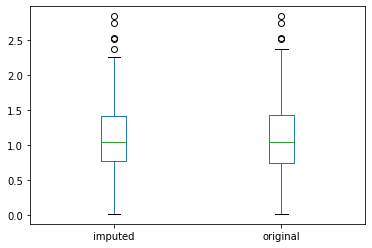

In [253]:
# read a copy of missing data with null values
missing_data_copy = pd.read_csv("missing_data.csv")

# draw the boxplot
boxplot = pd.DataFrame({'imputed': missing_data.distance_to_nearest_warehouse,'original': missing_data_copy.distance_to_nearest_warehouse})
boxplot.plot(kind = 'box')

We can see that the imputed distance and original distance has very similar distribution, the imputed data seems to have a smaller deviation, but overall it fits well with the spread of orginal data.
Thus, we can say that the imputation of null values are done well.

### 5.6 `nearest_warehouse`

The name of the `nearest_warehouse` depends on the distance_to_nearest_warehouse. For missing warehouse names, the distances were missing too. Thus, it is the case where missing values depends on unobserved predictors. However it would be too complicate to impute the coordinates of warehouse by customer's coordinates and distance.

Let's group data by the three warehouse names and check the mean of the rest of the varibales.

In [254]:
# check mean of other variables
missing_data.groupby("nearest_warehouse").mean()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,is_expedited_delivery,distance_to_nearest_warehouse,is_happy_customer
nearest_warehouse,,,,,,,,,
Bakers,12164.400000,78.823600,-37.812207,144.997330,10.400000,10977.086100,0.560000,1.221615,0.750000
Nickolson,15010.067568,74.631486,-37.814824,144.969496,11.520270,13414.020000,0.520270,0.985147,0.675676
Thompson,13878.477157,78.269746,-37.810649,144.948249,11.167513,12398.432183,0.497462,1.138260,0.771574


We can see that the mean of distance between customer and warehouse differs for different warehouse names. Is it possible to 
define a distance range and guess the missing warehouse name through match distance with range? Check the max of min distance for each warehouse.

In [255]:
missing_data.groupby("nearest_warehouse").distance_to_nearest_warehouse.describe()

,count,mean,std,min,25%,50%,75%,max
nearest_warehouse,,,,,,,,
Bakers,100.0,1.221615,0.481578,0.2051,0.879825,1.14640,1.59755,2.5408
Nickolson,148.0,0.985147,0.482428,0.0672,0.626925,0.96865,1.30820,2.1438
Thompson,197.0,1.138260,0.512713,0.0121,0.839600,1.03950,1.43890,2.8457


It seems like the range over laps with each other. Thus we can not really guess the warehouse name based on distance.

Let's try the same thing on latitude and longitude

In [256]:
missing_data.groupby("nearest_warehouse").customer_lat.describe()

,count,mean,std,min,25%,50%,75%,max
nearest_warehouse,,,,,,,,
Bakers,100.0,-37.812207,0.007679,-37.825125,-37.818960,-37.812641,-37.806312,-37.793099
Nickolson,148.0,-37.814824,0.006961,-37.826856,-37.820112,-37.815972,-37.809525,-37.799353
Thompson,197.0,-37.810649,0.007413,-37.825504,-37.816592,-37.811023,-37.804508,-37.797617


In [257]:
missing_data.groupby("nearest_warehouse").customer_long.describe()

,count,mean,std,min,25%,50%,75%,max
nearest_warehouse,,,,,,,,
Bakers,100.0,144.997330,0.010866,144.975812,144.988301,144.996306,145.005924,145.019342
Nickolson,148.0,144.969496,0.007475,144.956059,144.964111,144.968566,144.974345,144.989029
Thompson,197.0,144.948249,0.010311,144.916799,144.941736,144.951018,144.955863,144.963880


The range of longitude correspond to each warehouse names seems better for our prediction. 

The three ranges have very little overlaps and it make sense where a customer's nearest warehouse depends on location.

So we use the min and max as boundaries and assume: 
    - bakers have range of (144.989029 to 145.019342)  
  
    as nickolson have a higher count than bakers, we will use the maximum longitude of Nickolson as minimum for bakers.
    - Nickolson have range of  (144.963880 to 144.989029)
    
    as Thompson have a higher count than nickolson, we will use the maximum longitude of Thompson as minimum for nickolson.
    - Thompson have range of (144.916799 to 144.963880)

In [258]:
# create a list contain index of rows missing warehouse names
missing_ware = missing_data[missing_data.nearest_warehouse.isnull()].index.tolist()

In [259]:
# given range, fill the warehouse names
for i in missing_ware:
    if 144.989029 < missing_data.customer_long[i] < 145.019342:
        missing_data.nearest_warehouse[i] = "Bakers"
    elif 144.963880 < missing_data.customer_long[i] < 144.989029:
        missing_data.nearest_warehouse[i] = "Nickolson"
    elif 144.916799 < missing_data.customer_long[i] < 144.963880:
        missing_data.nearest_warehouse[i] = "Thompson"


In [260]:
# check missing data again
missing_data[missing_data.nearest_warehouse.isnull()].index.tolist()

[]

## 6. Outlier data

For this task, we need to investigate outliers, given outliers are to be found w.r.t. `delivery_charges` attribute only.

First, we start by investigating the distribution of delivery charge.

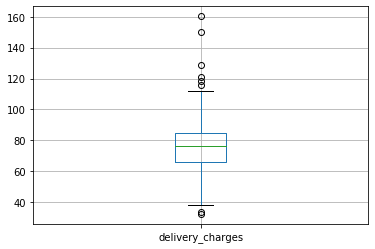

In [261]:
# box plot of delivery charges
%matplotlib inline
box_delivery = outlier_data.boxplot(column = "delivery_charges")

Outlier is a value that actually exist, but considered to be very unlikely, so we can not fix it, we have to choose to keep it or remove it. In this case, `delivery_charges` seems to have outliers, but we still need to investigate the data more closely by dividing it into categories.

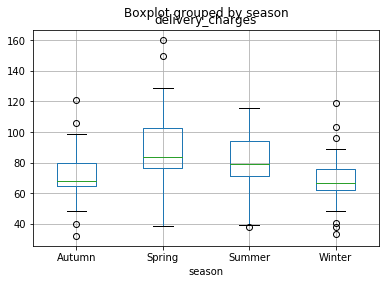

In [262]:
# box plot of delivery charges via season
box_delivery = outlier_data.boxplot(column = "delivery_charges", by = "season")

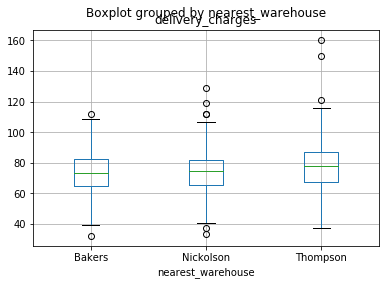

In [263]:
# box plot of delivery charges via warehouse
box_delivery = outlier_data.boxplot(column = "delivery_charges", by = "nearest_warehouse")

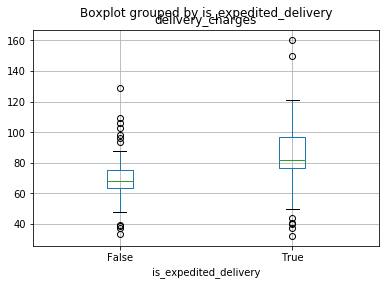

In [264]:
# box plot of delivery charges via warehouse
box_delivery = outlier_data.boxplot(column = "delivery_charges", by = "is_expedited_delivery")

After checking outliers againest different categories, the season category makes the most sense. Delivery charges calcualted differently
for each season. Thus, we should consider the distribution of delivery charges in four seasons differently. Therefore, the outliers in each season need to be removed seperatly.

In [265]:
# calculate IQR for four season
q1_Spring = outlier_data.delivery_charges[outlier_data.season == "Spring"].quantile(0.25)
q3_Spring = outlier_data.delivery_charges[outlier_data.season == "Spring"].quantile(0.75)
IQR_Spring = q3_Spring - q1_Spring 

q1_Summer = outlier_data.delivery_charges[outlier_data.season == "Summer"].quantile(0.25)
q3_Summer = outlier_data.delivery_charges[outlier_data.season == "Summer"].quantile(0.75)
IQR_Summer = q3_Summer - q1_Summer 

q1_Autumn = outlier_data.delivery_charges[outlier_data.season == "Autumn"].quantile(0.25)
q3_Autumn = outlier_data.delivery_charges[outlier_data.season == "Autumn"].quantile(0.75)
IQR_Autumn = q3_Autumn - q1_Autumn

q1_Winter = outlier_data.delivery_charges[outlier_data.season == "Winter"].quantile(0.25)
q3_Winter = outlier_data.delivery_charges[outlier_data.season == "Winter"].quantile(0.75)
IQR_Winter = q3_Winter - q1_Winter

In [266]:
# find outliers in four season
Spring_outlier = outlier_data.delivery_charges[outlier_data.season == "Spring"][(outlier_data.delivery_charges < (q1_Spring - 1.5*IQR_Spring)) | (outlier_data.delivery_charges > (q3_Spring + 1.5*IQR_Spring))]

Summer_outlier = outlier_data.delivery_charges[outlier_data.season == "Summer"][(outlier_data.delivery_charges < (q1_Summer - 1.5*IQR_Summer)) | (outlier_data.delivery_charges > (q3_Summer + 1.5*IQR_Summer))]

Autumn_outlier = outlier_data.delivery_charges[outlier_data.season == "Autumn"][(outlier_data.delivery_charges < (q1_Autumn - 1.5*IQR_Autumn)) | (outlier_data.delivery_charges > (q3_Autumn + 1.5*IQR_Autumn))]

Winter_outlier = outlier_data.delivery_charges[outlier_data.season == "Winter"][(outlier_data.delivery_charges < (q1_Winter - 1.5*IQR_Winter)) | (outlier_data.delivery_charges > (q3_Winter + 1.5*IQR_Winter))]

In [267]:
# remove outliers from dataset
outlier_data.drop(Spring_outlier.index.tolist(), inplace = True)
outlier_data.drop(Summer_outlier.index.tolist(), inplace = True)
outlier_data.drop(Autumn_outlier.index.tolist(), inplace = True)
outlier_data.drop(Winter_outlier.index.tolist(), inplace = True)

## 7. Output dataset

In [268]:
# output datasets to csv
dirty_data.to_csv('dirty_data_solution.csv',index = False)
missing_data.to_csv('missing_data_solution.csv',index = False)
outlier_data.to_csv('outlier_data_solution.csv',index = False)

## Referance
nltk.sentiment.vader module

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.